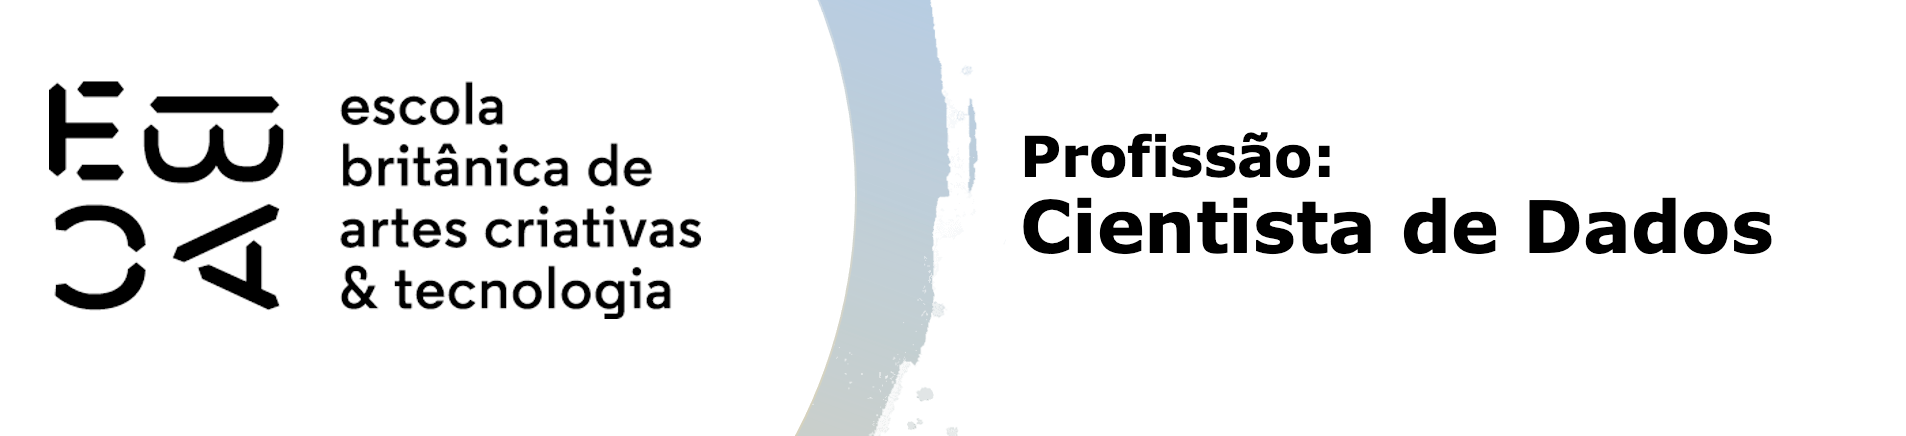

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm

from datetime import datetime, timedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.outliers_influence import OLSInfluence

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('previsao_de_renda_II.csv')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [265]:
df['tempo_emprego'] = df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

In [266]:
df.isna().sum()

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [267]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
data_max=df['data_ref'].max()
limite_3_meses = data_max - timedelta(days=90)
df_test=df[df['data_ref'] >= limite_3_meses]
df_train=df[df['data_ref'] < limite_3_meses]
df_train

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,2015-12-01,4650,F,N,S,1,Assalariado,Superior incompleto,Solteiro,Casa,37,4.441096,2.0,1893.35
599996,2015-12-01,9717,M,S,S,0,Empresário,Médio,Casado,Estúdio,44,2.345205,2.0,3080.48
599997,2015-12-01,7485,M,S,S,0,Assalariado,Médio,Casado,Casa,28,0.736986,2.0,5131.20
599998,2015-12-01,15500,F,S,S,1,Empresário,Superior completo,Solteiro,Casa,27,6.791781,2.0,20449.25


In [270]:
reg = smf.ols('''I(np.log(renda)) ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda 
               + educacao + estado_civil + tipo_residencia + idade + tempo_emprego''',data=df_train).fit()
print(f'R-quadrado: {reg.rsquared_adj:.2%}')
reg.summary()

R-quadrado: 43.77%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       I(np.log(renda))   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 2.123e+04
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:09:17   Log-Likelihood:            -7.9751e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599977   BIC:                         1.595e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.9582      0.016    492.831      0.000       7.927       7.990
sexo[T.M]                            0.1354      0.003     48.565      0.000       0.130       0.141
posse_de_veiculo[T.S]                0.0059      0.003      2.208      0.027       0.001       0.011
posse_de_imovel[T.S]                 0.1856      0.003     71.600      0.000       0.181       0.191
tipo_renda[T.Bolsista]              -0.2184      0.052     -4.165      0.000      -0.321      -0.116
tipo_renda[T.Empresário]             0.1447      0.003     48.389      0.000       0.139       0.151
tipo_renda[T.Pensionista]           -0.2975      0.004    -69.731      0.000      -0.306      -0.289
tipo_renda[T.Servidor público]       0.1336      0.004     30.339      0.000       0.125       0.142
educacao[T.Médio]                    0.0304      0.011      2.717      0.007       0.008       0.052
educacao[T.Pós graduação]            0.1559      0.038      4.088      0.000       0.081       0.231
educacao[T.Superior completo]        0.1238      0.011     10.936      0.000       0.102       0.146
educacao[T.Superior incompleto]      0.0434      0.013      3.425      0.001       0.019       0.068
estado_civil[T.Separado]             0.0238      0.005      4.571      0.000       0.014       0.034
estado_civil[T.Solteiro]             0.0053      0.004      1.431      0.153      -0.002       0.013
estado_civil[T.União]                0.0090      0.005      2.003      0.045       0.000       0.018
estado_civil[T.Viúvo]                0.0074      0.006      1.202      0.229      -0.005       0.019
tipo_residencia[T.Casa]             -0.0875      0.010     -8.588      0.000      -0.107      -0.068
tipo_residencia[T.Com os pais]      -0.0555      0.012     -4.804      0.000      -0.078      -0.033
tipo_residencia[T.Comunitário]      -0.1402      0.021     -6.823      0.000      -0.180      -0.100
tipo_residencia[T.Estúdio]          -0.1391      0.017     -8.106      0.000      -0.173      -0.105
tipo_residencia[T.Governamental]    -0.0930      0.012     -7.668      0.000      -0.117      -0.069
idade                                0.0040      0.000     27.229      0.000       0.004       0.004
tempo_emprego                        0.1290      0.000    619.797      0.000       0.129       0.129
==============================================================================
Omnibus:                     1085.526   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              955.641
Skew:                          -0.052   Prob(JB):                    3.06e-208
Kurtosis:                       2.835   Cond. No.                     2.04e+03
==============================================================

In [272]:
reg1_teste = smf.ols('''I(np.log(renda)) ~ sexo + posse_de_veiculo + posse_de_imovel + tipo_renda 
               + educacao + estado_civil + tipo_residencia + idade + tempo_emprego''', data=df_test).fit()
print("\nLog-Transformação na Base de Teste")
print(f'R-quadrado (Teste): {reg1_teste.rsquared:.2%}')


Log-Transformação na Base de Teste
R-quadrado (Teste): 54.78%


## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?

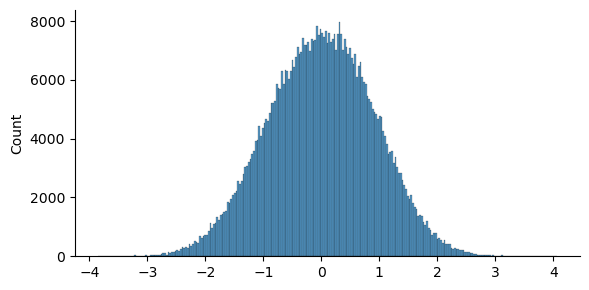

In [275]:
sns.displot(reg.resid, height=3, aspect=2);

<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <p>O modelo possue distribuição Normal </p>
</div>

- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência

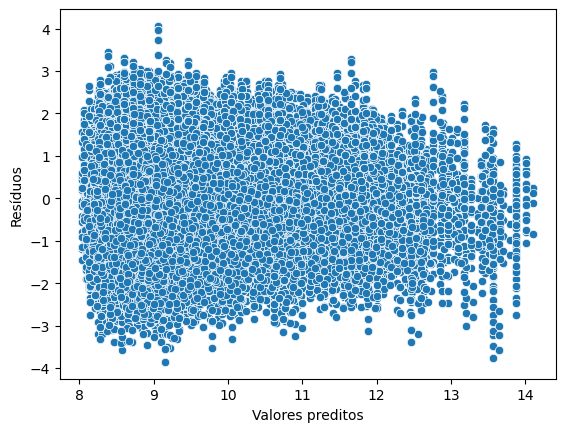

In [278]:
sns.scatterplot(x = reg.predict(), y = reg.resid)
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.show()

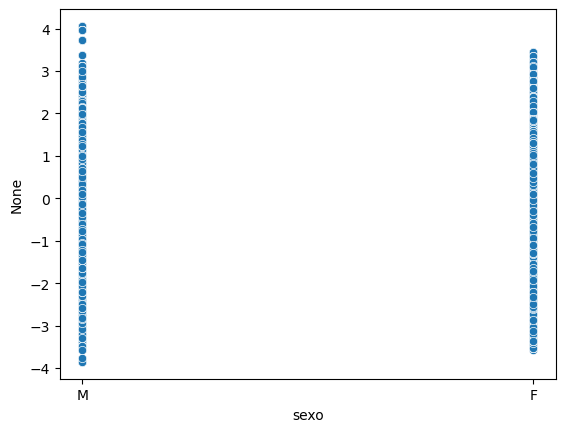

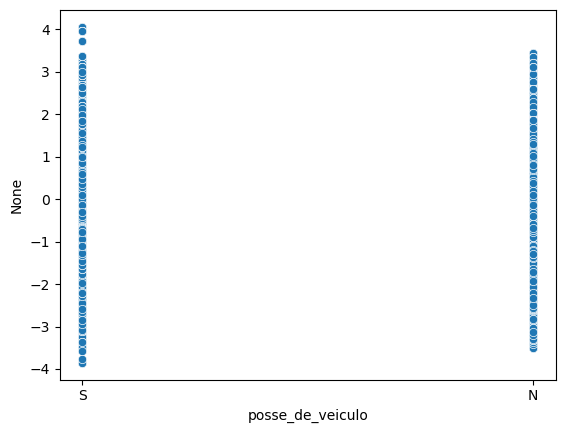

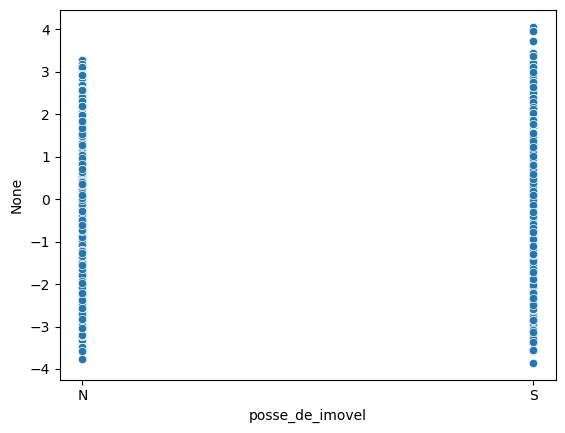

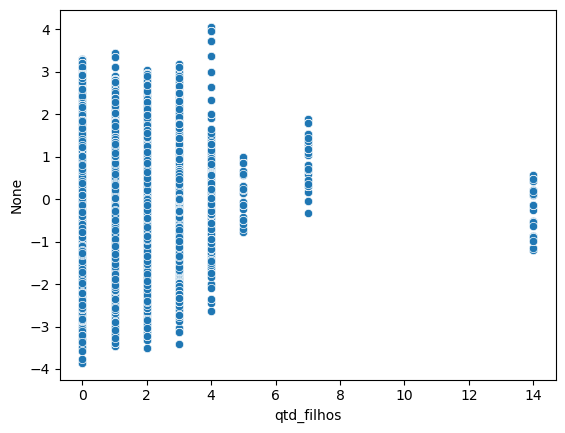

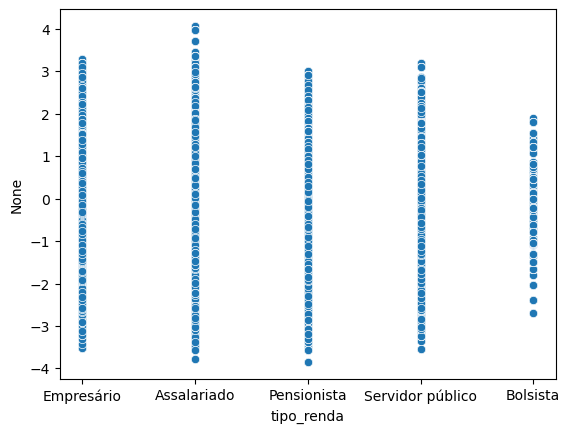

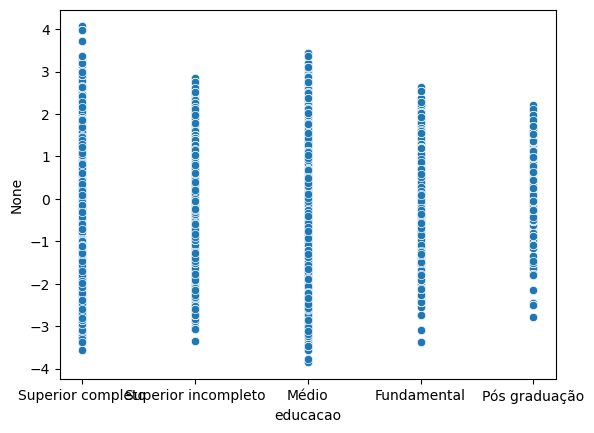

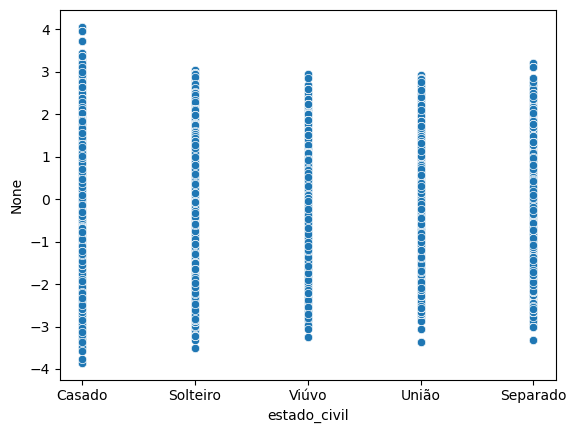

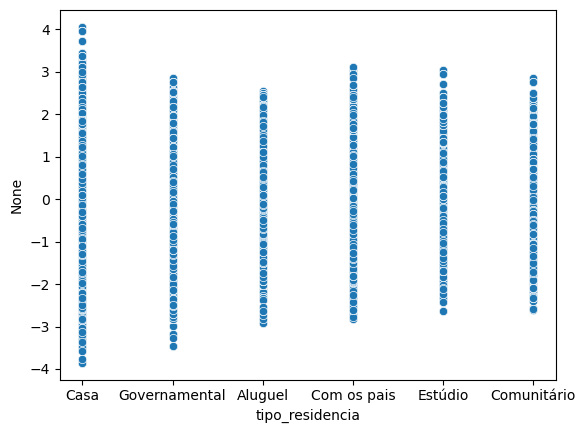

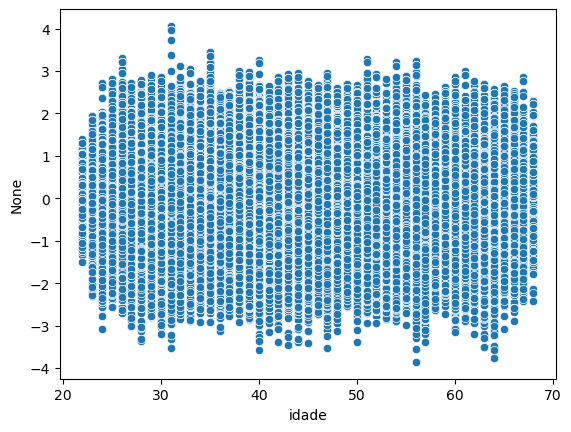

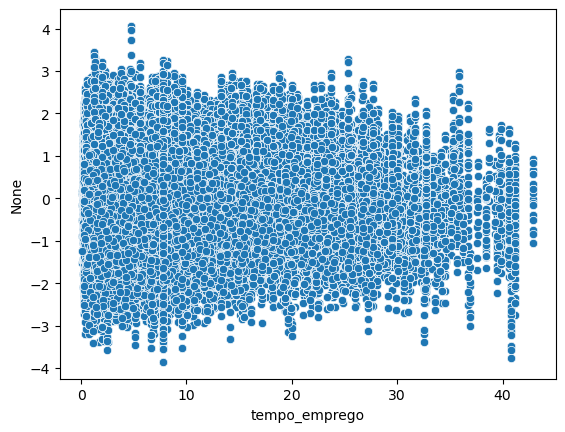

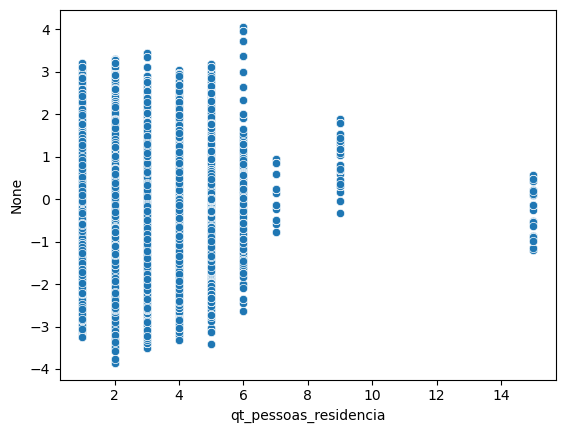

In [279]:
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']

for i in variaveis:
    plt.figure()
    sns.scatterplot(x = df_train[i], y = reg.resid);
    plt.show()

<Axes: xlabel='mes', ylabel='resid'>

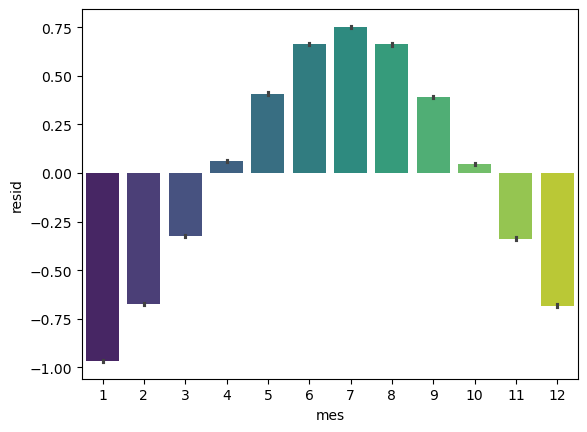

In [280]:
df_mes = df_train.copy()
df_mes['mes'] = df_mes['data_ref'].dt.month
df_mes['resid'] = reg.resid
mean_res = df_mes[['mes', 'resid']].groupby('mes').mean()
sns.barplot(x='mes', y='resid', data=df_mes, palette='viridis')

- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

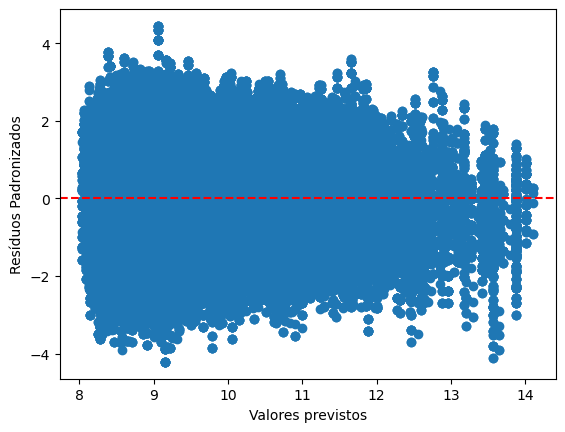

In [282]:
residuos_padronizados = reg.resid / np.std(reg.resid)

plt.scatter(reg.predict(), residuos_padronizados)
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos Padronizados')
plt.axhline(0, color='r', linestyle='--')
plt.show()

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <p>As suposições foram atendidas.Não há impacto em eventuais desvios os resíduos são independentes entre si e posuem a mesma variância. </p>
</div>

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

Número de outliers identificados: 1012
        studentized_residuals
186                 -3.326528
369                 -3.326528
488                 -3.179817
524                 -3.427788
679                 -3.136349
...                       ...
598278              -3.117589
598432              -3.685348
598743              -3.125698
599013              -3.076968
599381              -3.411139

[1012 rows x 1 columns]


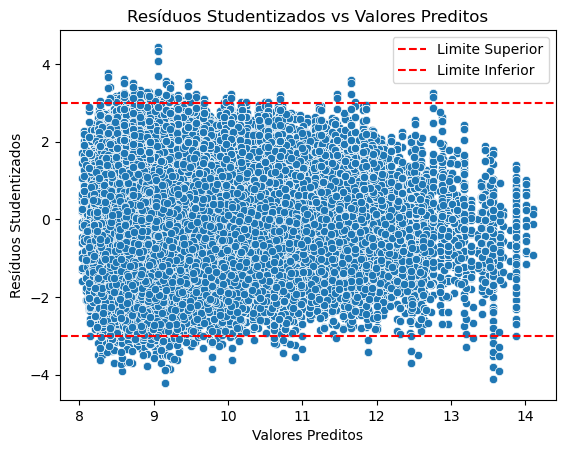

In [286]:
# Valores previstos
df_train['valores_preditos'] = reg.fittedvalues
# Criar um objeto para calcular influências
influence = OLSInfluence(reg)

# Resíduos studentizados
df_train['studentized_residuals'] = influence.resid_studentized_internal

# Visualizar outliers
outliers = df_train[np.abs(df_train['studentized_residuals']) > 3]
print(f"Número de outliers identificados: {len(outliers)}")
print(outliers[['studentized_residuals']])

# Plot dos resíduos studentizados
sns.scatterplot(x=df_train['valores_preditos'], y=df_train['studentized_residuals'])
plt.axhline(y=3, color='r', linestyle='--', label='Limite Superior')
plt.axhline(y=-3, color='r', linestyle='--', label='Limite Inferior')
plt.title('Resíduos Studentizados vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Studentizados')
plt.legend()
plt.show()

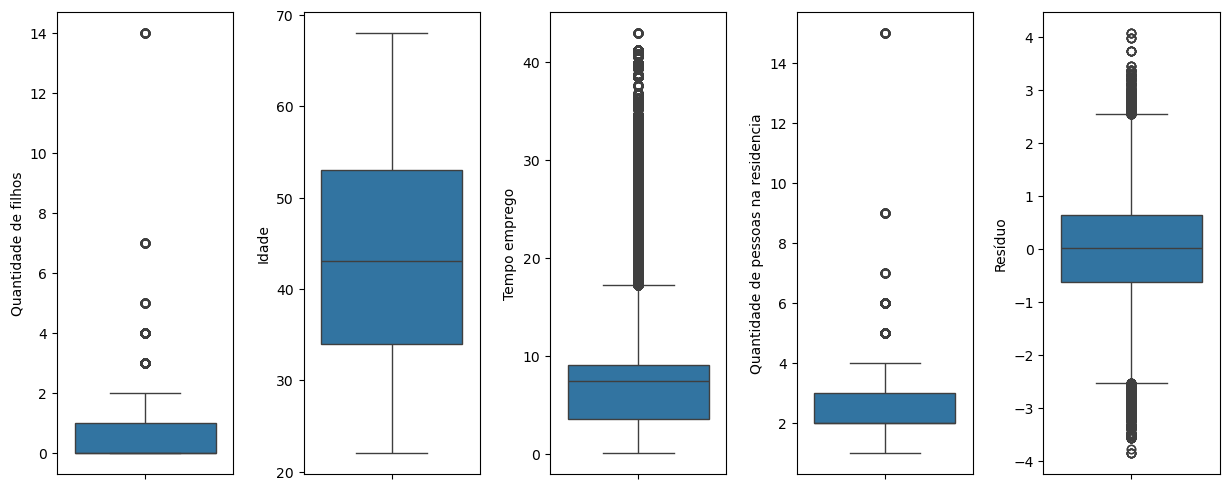

In [287]:
fix, ax = plt.subplots(1, 5, figsize=(15,6))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = 'qtd_filhos',data=df_train, ax=ax[0])
sns.boxplot(y = 'idade',data=df_train, ax=ax[1])
sns.boxplot(y = 'tempo_emprego' ,data=df_train, ax=ax[2])
sns.boxplot(y = 'qt_pessoas_residencia' ,data=df_train, ax=ax[3])
sns.boxplot(y = reg.resid ,data=df_train, ax=ax[4]);

ax[0].set_ylabel('Quantidade de filhos')
ax[1].set_ylabel('Idade')
ax[2].set_ylabel('Tempo emprego')
ax[3].set_ylabel('Quantidade de pessoas na residencia');
ax[4].set_ylabel('Resíduo');

<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <p>Quantidade de pessoas na residencia e quantidade de filhos possuem valores que aparentam ser outliers</p>
</div>

## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman


In [290]:
df_train.corr(method='spearman',numeric_only=True)

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,valores_preditos,studentized_residuals
index,1.000000,0.029364,-0.047196,-0.029263,0.031703,-0.019073,-0.038013,0.004110
qtd_filhos,0.029364,1.000000,-0.415384,-0.090583,0.828570,-0.020244,-0.040039,0.006638
idade,-0.047196,-0.415384,1.000000,0.301418,-0.350081,0.113378,0.197138,0.001111
tempo_emprego,-0.029263,-0.090583,0.301418,1.000000,-0.058691,0.531836,0.926026,0.008655
qt_pessoas_residencia,0.031703,0.828570,-0.350081,-0.058691,1.000000,-0.007401,-0.012109,0.005001
renda,-0.019073,-0.020244,0.113378,0.531836,-0.007401,1.000000,0.560721,0.781054
valores_preditos,-0.038013,-0.040039,0.197138,0.926026,-0.012109,0.560721,1.000000,0.012446
studentized_residuals,0.004110,0.006638,0.001111,0.008655,0.005001,0.781054,0.012446,1.000000


<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <p>Existe uma alta correlação entre quantidade de pessoas na residencia e quantidade de filhos</p>
</div>

- VIF

In [293]:
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']
df_dum = pd.get_dummies(df_train[variaveis], drop_first=True)
df_dum.columns = df_dum.columns.str.replace(' ', '_')
df_dum = df_dum.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
df_dum.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,posse_de_veiculo_S,posse_de_imovel_S,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior_incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com_os_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0,47,16.717808,2.0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,30,9.600000,2.0,1,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,28,8.208219,2.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,44,1.301370,4.0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,33,1.254795,4.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [294]:
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum, i) for i in range(df_dum.shape[1])]
vars_vif["Feature"] = df_dum.columns

vars_vif.round(2)

,VIF Factor,Feature
0,34.58,qtd_filhos
1,34.68,idade
2,3.02,tempo_emprego
3,241.89,qt_pessoas_residencia
4,1.82,sexo_M
5,1.97,posse_de_veiculo_S
6,3.24,posse_de_imovel_S
7,1.00,tipo_renda_Bolsista
8,1.48,tipo_renda_Empresário
9,2.20,tipo_renda_Pensionista


<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <p> Alto valores de VIF em quantidade de pessoas na residencia, quantidade de filhos, idade, educação médio, educação superior completo e tipo de residencia casa </p>
</div>

## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

In [297]:
df_dum2=df_dum.drop(['qt_pessoas_residencia','idade','educacao_Médio','tipo_residencia_Casa'], axis=1)
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(df_dum2, i) for i in range(df_dum2.shape[1])]
vars_vif["Feature"] = df_dum2.columns

vars_vif.round(2)

,VIF Factor,Feature
0,1.39,qtd_filhos
1,2.06,tempo_emprego
2,1.68,sexo_M
3,1.88,posse_de_veiculo_S
4,2.42,posse_de_imovel_S
5,1.00,tipo_renda_Bolsista
6,1.37,tipo_renda_Empresário
7,1.35,tipo_renda_Pensionista
8,1.19,tipo_renda_Servidor_público
9,1.00,educacao_Pós_graduação


In [298]:
df_dum2['renda']=df_train['renda'].copy()
reg2 = smf.ols('''I(np.log(renda)) ~ qtd_filhos + tempo_emprego + sexo_M + posse_de_veiculo_S
                                   +posse_de_imovel_S + tipo_renda_Bolsista + tipo_renda_Empresário
                                   +tipo_renda_Pensionista + tipo_renda_Servidor_público
                                   +educacao_Pós_graduação + educacao_Superior_completo
                                   +educacao_Superior_incompleto + estado_civil_Separado
                                   +estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo
                                   +tipo_residencia_Com_os_pais + tipo_residencia_Comunitário
                                   +tipo_residencia_Estúdio+tipo_residencia_Governamental''',data=df_dum2).fit()
print(f'R-quadrado: {reg2.rsquared_adj:.2%}')
df_dum2['valores_preditos'] = reg2.fittedvalues
influence = OLSInfluence(reg)
df_dum2['studentized_residuals'] = influence.resid_studentized_internal

# Identificar outliers (valores com resíduos studentizados > 3 ou < -3)
outliers = df_train[np.abs(df_train['studentized_residuals']) > 3]
df_sem_outliers = df_dum2[(np.abs(df_dum2['studentized_residuals']) <= 3) & (df_sem_outliers_studentized_residuals['qtd_filhos'] < 7)]

R-quadrado: 43.70%


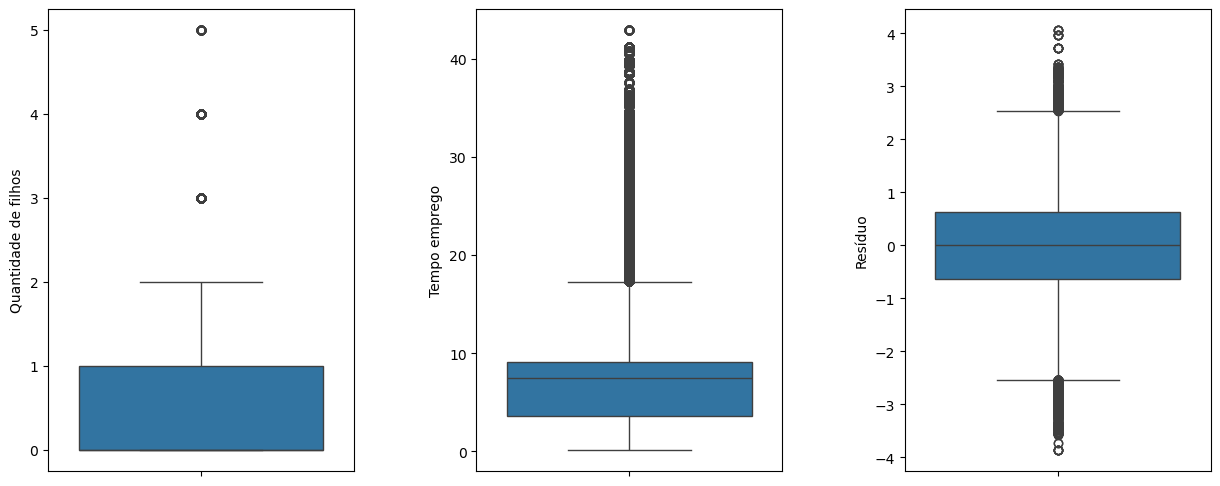

In [299]:
fix, ax = plt.subplots(1, 3, figsize=(15,6))
plt.subplots_adjust(wspace=.4, hspace=0)

sns.boxplot(y = 'qtd_filhos',data=df_sem_outliers, ax=ax[0])
sns.boxplot(y = 'tempo_emprego' ,data=df_sem_outliers, ax=ax[1])
sns.boxplot(y = reg2.resid ,data=df_sem_outliers, ax=ax[2]);

ax[0].set_ylabel('Quantidade de filhos')
ax[1].set_ylabel('Tempo emprego')
ax[2].set_ylabel('Resíduo');

In [300]:
reg3 = smf.ols('''I(np.log(renda)) ~ qtd_filhos + tempo_emprego + sexo_M + posse_de_veiculo_S
                                   +posse_de_imovel_S + tipo_renda_Bolsista + tipo_renda_Empresário
                                   +tipo_renda_Pensionista + tipo_renda_Servidor_público
                                   +educacao_Pós_graduação + educacao_Superior_completo
                                   +educacao_Superior_incompleto + estado_civil_Separado
                                   +estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo
                                   +tipo_residencia_Com_os_pais + tipo_residencia_Comunitário
                                   +tipo_residencia_Estúdio+tipo_residencia_Governamental''',data=df_sem_outliers).fit()
print(f'R-quadrado: {reg3.rsquared_adj:.2%}')
reg3.summary()

R-quadrado: 44.13%


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       I(np.log(renda))   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 2.365e+04
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:11:04   Log-Likelihood:            -7.9096e+05
No. Observations:              598778   AIC:                         1.582e+06
Df Residuals:                  598757   BIC:                         1.582e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         8.0632      0.004   2229.762      0.000       8.056       8.070
qtd_filhos                       -0.0108      0.002     -6.271      0.000      -0.014      -0.007
tempo_emprego                     0.1307      0.000    659.979      0.000       0.130       0.131
sexo_M                            0.1333      0.003     48.284      0.000       0.128       0.139
posse_de_veiculo_S                0.0042      0.003      1.603      0.109      -0.001       0.009
posse_de_imovel_S                 0.1898      0.003     73.940      0.000       0.185       0.195
tipo_renda_Bolsista              -0.1878      0.052     -3.611      0.000      -0.290      -0.086
tipo_renda_Empresário             0.1445      0.003     48.645      0.000       0.139       0.150
tipo_renda_Pensionista           -0.2317      0.004    -65.809      0.000      -0.239      -0.225
tipo_renda_Servidor_público       0.1355      0.004     30.973      0.000       0.127       0.144
educacao_Pós_graduação            0.1384      0.036      3.817      0.000       0.067       0.209
educacao_Superior_completo        0.0842      0.003     32.713      0.000       0.079       0.089
educacao_Superior_incompleto     -0.0078      0.006     -1.270      0.204      -0.020       0.004
estado_civil_Separado             0.0328      0.005      6.355      0.000       0.023       0.043
estado_civil_Solteiro             0.0007      0.004      0.202      0.840      -0.007       0.008
estado_civil_União                0.0034      0.004      0.770      0.441      -0.005       0.012
estado_civil_Viúvo                0.0230      0.006      3.786      0.000       0.011       0.035
tipo_residencia_Com_os_pais       0.0074      0.006      1.278      0.201      -0.004       0.019
tipo_residencia_Comunitário      -0.0591      0.018     -3.318      0.001      -0.094      -0.024
tipo_residencia_Estúdio          -0.0579      0.014     -4.183      0.000      -0.085      -0.031
tipo_residencia_Governamental    -0.0050      0.007     -0.741      0.459      -0.018       0.008
==============================================================================
Omnibus:                     2824.227   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2133.566
Skew:                          -0.046   Prob(JB):                         0.00
Kurtosis:                       2.722   Cond. No.                         440.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Número de outliers identificados: 51
        studentized_residuals
2333                -3.009707
9104                -3.019867
10001               -3.018115
11966               -3.003161
14674               -3.003161
18242               -3.001705
18909               -3.020699
19222               -3.009707
22181               -3.009707
22522               -3.018115
26037               -3.016104
26254               -3.018115
26334               -3.009707
27112               -3.009707
33179               -3.016104
35329               -3.016104
38020               -3.020699
39056               -3.009707
39318               -3.018115
40623               -3.001705
41955               -3.016104
43143               -3.003161
47600               -3.003161
49828               -3.016104
62724               -3.004225
74446               -3.004225
108031              -3.023051
122046              -3.005754
124987              -3.023051
127640              -3.005754
138365              -3.023051
250

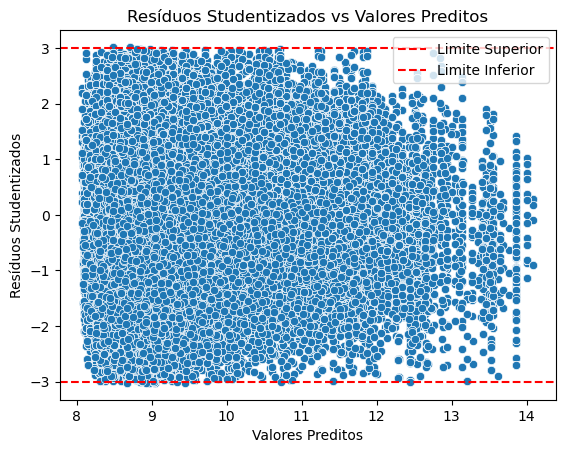

In [301]:

# Valores previstos
df_sem_outliers['valores_preditos'] = reg3.fittedvalues
# Criar um objeto para calcular influências
influence = OLSInfluence(reg3)

# Resíduos studentizados
df_sem_outliers['studentized_residuals'] = influence.resid_studentized_internal

# Visualizar outliers
outliers = df_sem_outliers[np.abs(df_sem_outliers['studentized_residuals']) > 3]
print(f"Número de outliers identificados: {len(outliers)}")
print(outliers[['studentized_residuals']])

# Plot dos resíduos studentizados
sns.scatterplot(x=df_sem_outliers['valores_preditos'], y=df_sem_outliers['studentized_residuals'])
plt.axhline(y=3, color='r', linestyle='--', label='Limite Superior')
plt.axhline(y=-3, color='r', linestyle='--', label='Limite Inferior')
plt.title('Resíduos Studentizados vs Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Studentizados')
plt.legend()
plt.show()

In [302]:
variaveis = ['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'tempo_emprego']
df_dum_test = pd.get_dummies(df_test[variaveis], drop_first=True)
df_dum_test.columns = df_dum_test.columns.str.replace(' ', '_')
df_dum_test = df_dum_test.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
df_dum_test['renda']=df_test['renda'].copy()

In [303]:
reg3_teste = smf.ols('''I(np.log(renda)) ~ qtd_filhos + tempo_emprego + sexo_M + posse_de_veiculo_S
                                   +posse_de_imovel_S + tipo_renda_Bolsista + tipo_renda_Empresário
                                   +tipo_renda_Pensionista + tipo_renda_Servidor_público
                                   +educacao_Pós_graduação + educacao_Superior_completo
                                   +educacao_Superior_incompleto + estado_civil_Separado
                                   +estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo
                                   +tipo_residencia_Com_os_pais + tipo_residencia_Comunitário
                                   +tipo_residencia_Estúdio+tipo_residencia_Governamental''', data=df_dum_test).fit()
print("\nLog-Transformação na Base de Teste")
print(f'R-quadrado (Teste): {reg3_teste.rsquared:.2%}')


Log-Transformação na Base de Teste
R-quadrado (Teste): 54.69%


<div style="background-color: #e6f7ff; padding: 20px; border: 3px solid #00b3b3; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    <p>O $R^2$ ajustado da primeira regressão é de 43.77% e o $R^2$ ajustado da última regressão é de 44.13%, foi obtido uma melhora de 0.36%. Na base de treino o $R^2$ ajustado é de 54.78% na primeira regressão e na última regressão é de 54.69%, foi obtido uma piora de 0.09%.</p>
</div>